# RandomForestRegressor Grid Search CV

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ./Model_Eval.ipynb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
training_data = pd.read_csv('../Datasets/training_data_with_aqi.csv').sample(frac=1)

In [3]:
# import from Model_Eval.ipynb
numerical_features = get_numerical_features(training_data)

X = training_data[numerical_features]
Y = training_data['DIABETES_3Y_Change_Percentage']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [4]:
parameters = {
    'max_depth': [5, 20, 50, 100, 200],
    'n_estimators': [20, 100, 500, 1000],
    'max_features': ['sqrt', 'log2', 1, 5, 10]
}

In [5]:
rf = RandomForestRegressor(random_state = 42)

In [6]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    cv=5,
    n_jobs=16,
    verbose=1
)

In [7]:
grid_search.fit(X, Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/tychi/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=16,
             param_grid={'max_depth': [5, 20, 50, 100, 200],
                         'max_features': ['sqrt', 'log2', 1, 5, 10],
                         'n_estimators': [20, 100, 500, 1000]},
             verbose=1)

In [8]:
best_params = grid_search.best_params_
best_params

{'max_depth': 100, 'max_features': 'log2', 'n_estimators': 500}

# Get Cross Val R2 scores, using the best estimator

In [9]:
rf = grid_search.best_estimator_

r2_scores = cross_val_score(
    rf, X, Y, cv=5, scoring='r2'
)

In [10]:
r2_scores

array([0.26992179, 0.27742631, 0.2223347 , 0.20131043, 0.23959733])

In [11]:
feature_importance_list = list(zip(numerical_features, rf.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)
top_features = feature_importance_list[0:10]

In [13]:
feature_importance_list

[('BPMED_trend', 0.03470480380651),
 ('DIABETES_2017', 0.032236662456437935),
 ('HIGHCHOL_2017', 0.031887104984456134),
 ('DIABETES_trend', 0.03132444729300505),
 ('BPMED_2017', 0.029201437482867087),
 ('CHECKUP_2017', 0.028705590125459503),
 ('CASTHMA_trend', 0.028026074214224005),
 ('CASTHMA_2017', 0.027371311797505744),
 ('CSMOKING_trend', 0.02566180904792594),
 ('CHECKUP_trend', 0.02520888073577652),
 ('COPD_2017', 0.024562197886417357),
 ('LPA_trend', 0.024302596721549333),
 ('CHOLSCREEN_2017', 0.024296759818069658),
 ('ACCESS2_2017', 0.023816705419361678),
 ('OBESITY_2017', 0.023657064659876617),
 ('HIGHCHOL_trend', 0.02349483477124649),
 ('ARTHRITIS_2017', 0.023296782665142204),
 ('BINGE_trend', 0.02328175117590808),
 ('OBESITY_trend', 0.022927781038434014),
 ('BPHIGH_trend', 0.022907169612995097),
 ('CSMOKING_2017', 0.022384545966411616),
 ('ARTHRITIS_trend', 0.02237764663143348),
 ('BPHIGH_2017', 0.021727556079805692),
 ('CHD_2017', 0.021714431466202385),
 ('BINGE_2017', 0.021

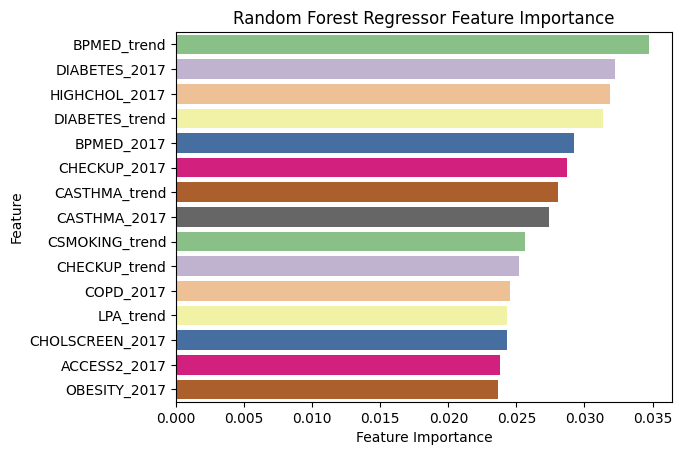

In [12]:
plot_feature_importance(rf.feature_importances_, numerical_features, 'Random Forest Regressor', 15)